<a href="https://colab.research.google.com/github/dlwnsgur9242/Age-and-prediction-models/blob/main/Age_and_prediction_models_JUN_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"leejunhyuk9242","key":"0e06082f9d1d40b0178db09fe20299e5"}'}

In [ ]:
!ls -1ha kaggle.json

kaggle.json


In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
# Permission Warning 방지
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#colab으로 utkface data 불러오기
!kaggle datasets download -d jangedoo/utkface-new

100% 331M/331M [00:08<00:00, 41.4MB/s]
100% 331M/331M [00:08<00:00, 39.0MB/s]


In [ ]:
# 다운받은 폴더 압축 풀기
!unzip utkface-new.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: utkface_aligned_cropped/crop_part1/34_1_0_20170109004755204.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_0_20170111182452832.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170103230340961.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170104011329697.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170104165020320.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170108230211421.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104022134829.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104023010725.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104172537171.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104201443273.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104204327523.jpg.chip.jp

In [ ]:
#https://www.kaggle.com/mohamedahmedae/utkface-v2-gender-97-race-94-age-mae-0-05 코드 참고
# 필요한 라이브러리 IMPORT
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
from glob import glob
import seaborn as sns
import plotly.graph_objects as go


# 숫자로 표현되어있는 인종, 성별 데이터를 문자열로 변환해주기 위한 dictionary 생성
dataset_dict = {
    'race_id': {
        0: 'white',
        1: 'black',
        2: 'asian',
        3: 'indian',
        4: 'others'
    },
    'gender_id': {
        0: 'male',
        1: 'female'
    }
}

dataset_dict['gender_alias'] = dict((g, i) for i, g in dataset_dict['gender_id'].items())
dataset_dict['race_alias'] = dict((g, i) for i, g in dataset_dict['race_id'].items())

folder_name = 'UTKFace'

# 데이터 프레임으로 만들어주기 위한 함수 지정

def parse_dataset(dataset_path, ext='jpg'):

    def parse_info_from_file(path):
        try:
            filename = os.path.split(path)[1]
            filename = os.path.splitext(filename)[0]
            age, gender, race, _ = filename.split('_')

            return int(age), dataset_dict['gender_id'][int(gender)], dataset_dict['race_id'][int(race)]
        except Exception as ex:
            return None, None, None

    files = glob(os.path.join(dataset_path, "*.%s" % ext))

    records = []
    for file in files:
        info = parse_info_from_file(file)
        records.append(info)

    df = pd.DataFrame(records)
    df['file'] = files
    df.columns = ['age', 'gender', 'race', 'file']
    df = df.dropna()

    return df

df = parse_dataset(folder_name)

df.head()

,age,gender,race,file
0,26.0,male,black,UTKFace/26_0_1_20170113151924968.jpg.chip.jpg
1,26.0,female,black,UTKFace/26_1_1_20170117022253411.jpg.chip.jpg
2,1.0,female,black,UTKFace/1_1_1_20170103210044250.jpg.chip.jpg
3,23.0,female,black,UTKFace/23_1_1_20170112234254088.jpg.chip.jpg
4,17.0,female,black,UTKFace/17_1_1_20170114030037010.jpg.chip.jpg


In [ ]:
!pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 94.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 80.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 89.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 75.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 28.1 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Fo

In [ ]:
#MODEL 구축을 위한 라이브러리 import
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPool2D, Activation, Dropout, Lambda, Dense, Flatten, Input
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as k

In [ ]:
import os
import cv2
import numpy as np

images = []
age = []
gender = []

for img in os.listdir(folder_name):
    ages = int(img.split("_")[0])  # 나이를 정수로 변환
    genders = int(img.split("_")[1])  # 성별을 정수로 변환

    # 이미지 파일 읽기
    img_path = os.path.join(folder_name, img)
    img = cv2.imread(img_path)

    # BGR에서 RGB로 색상 공간 변환
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # 이미지, 나이, 성별을 각각의 리스트에 추가
    images.append(img)
    age.append(ages)
    gender.append(genders)

# 리스트를 numpy 배열로 변환
images = np.array(images)
age = np.array(age, dtype=np.int64)
gender = np.array(gender, dtype=np.uint64)

In [ ]:
# 첫 번째 데이터셋을 나누기
x_train_age, x_test_age, y_train_age, y_test_age = train_test_split(images, age, random_state=42, test_size=0.4)
x_valid_age, x_test_age_2, y_valid_age, y_test_age_2 = train_test_split(x_test_age, y_test_age, random_state=42, test_size=0.5)

# 두 번째 데이터셋을 나누기
x_train_gender, x_test_gender, y_train_gender, y_test_gender = train_test_split(images, gender, random_state=42, test_size=0.4)
x_valid_gender, x_test_gender_2, y_valid_gender, y_test_gender_2 = train_test_split(x_test_gender, y_test_gender, random_state=42, test_size=0.5)

In [ ]:
# learning_rate 설정
init_lr = 1e-4
epochs = 50

# 과적합 방지를 위한 callback 설정
callbacks = [EarlyStopping(monitor='val_loss', patience=5),
             ModelCheckpoint(filepath='./model-{epoch:02d}-{val_loss:.2f}.keras',
                             monitor='val_loss',
                             save_best_only=True)]

# gender_model
gender_model = Sequential([
    Conv2D(36, kernel_size=3,input_shape=(200,200,3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D(pool_size=3, strides=2),
    Conv2D(64, kernel_size=3),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D(pool_size=3, strides=2),
    Conv2D(128, kernel_size=3),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D(pool_size=3, strides=2),
    Conv2D(256, kernel_size=3),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D(pool_size=3, strides=2),
    Conv2D(512, kernel_size=3),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D(pool_size=3, strides=2),
    Flatten(),
    Dropout(0.25),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid', name='gender')
])

opt_gender = tf.keras.optimizers.Adam(learning_rate=init_lr)  # gender_model을 위한 새로운 최적화 인스턴스 생성
gender_model.compile(loss='binary_crossentropy', optimizer=opt_gender, metrics=['accuracy'])


# age_model
age_model = Sequential([
    Conv2D(128, kernel_size=3, input_shape=(200,200,3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D(pool_size=3, strides=2),
    Conv2D(128, kernel_size=3),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D(pool_size=3, strides=2),
    Conv2D(256, kernel_size=3),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D(pool_size=3, strides=2),
    Conv2D(512, kernel_size=3),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D(pool_size=3, strides=2),
    Flatten(),
    Dropout(0.25),
    Dense(512, activation='relu'),
    Dense(1, activation='linear', name='age')
])

opt_age = tf.keras.optimizers.Adam(learning_rate=init_lr)  # age_model을 위한 새로운 최적화 인스턴스 생성
age_model.compile(loss="mse", optimizer=opt_age, metrics=['mae'])

# gender_model 학습
history_gender = gender_model.fit(x_train_gender, y_train_gender,
                                  validation_data=(x_valid_gender, y_valid_gender), batch_size=32, epochs=50,
                                  callbacks=callbacks)

# age_model 학습
history_age = age_model.fit(x_train_age, y_train_age,
                            validation_data=(x_valid_age, y_valid_age), batch_size=32, epochs=50, callbacks=callbacks)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/50
445/445 ━━━━━━━━━━━━━━━━━━━━ 43s 71ms/step - accuracy: 0.7373 - loss: 0.5947 - val_accuracy: 0.8383 - val_loss: 0.3735
Epoch 2/50
445/445 ━━━━━━━━━━━━━━━━━━━━ 23s 51ms/step - accuracy: 0.8408 - loss: 0.3547 - val_accuracy: 0.8661 - val_loss: 0.3071
Epoch 3/50
445/445 ━━━━━━━━━━━━━━━━━━━━ 23s 52ms/step - accuracy: 0.8720 - loss: 0.3010 - val_accuracy: 0.8646 - val_loss: 0.3095
Epoch 4/50
445/445 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - accuracy: 0.8952 - loss: 0.2483 - val_accuracy: 0.8663 - val_loss: 0.2989
Epoch 5/50
445/445 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - accuracy: 0.9019 - loss: 0.2331 - val_accuracy: 0.8524 - val_loss: 0.3465
Epoch 6/50
445/445 ━━━━━━━━━━━━━━━━━━━━ 24s 55ms/step - accuracy: 0.9188 - loss: 0.2097 - val_accuracy: 0.8844 - val_loss: 0.2752
Epoch 7/50
445/445 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - accuracy: 0.9329 - loss: 0.1688 - val_accuracy: 0.8849 - val_loss: 0.2618
Epoch 8/50
445/445 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - accuracy: 0.9446 - loss: 0.1441 - 

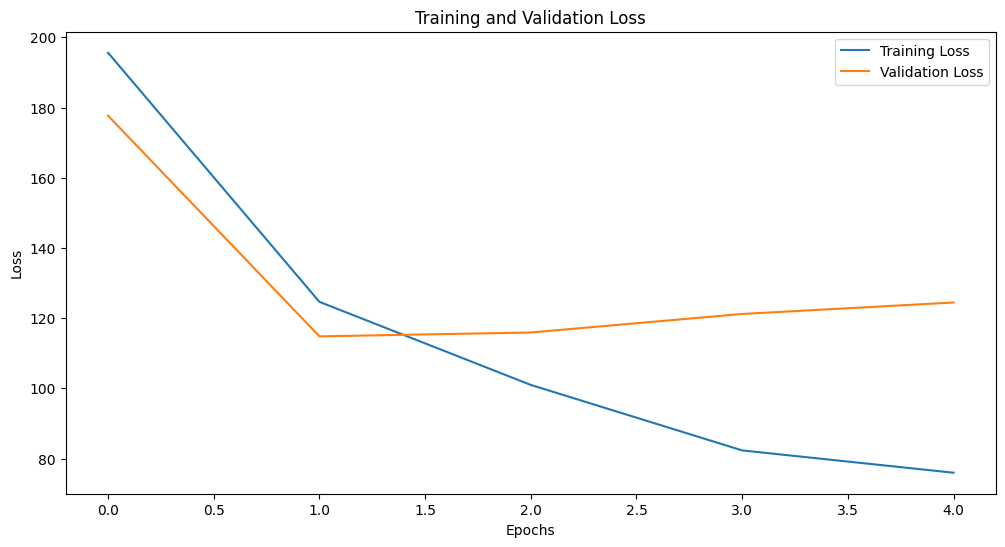

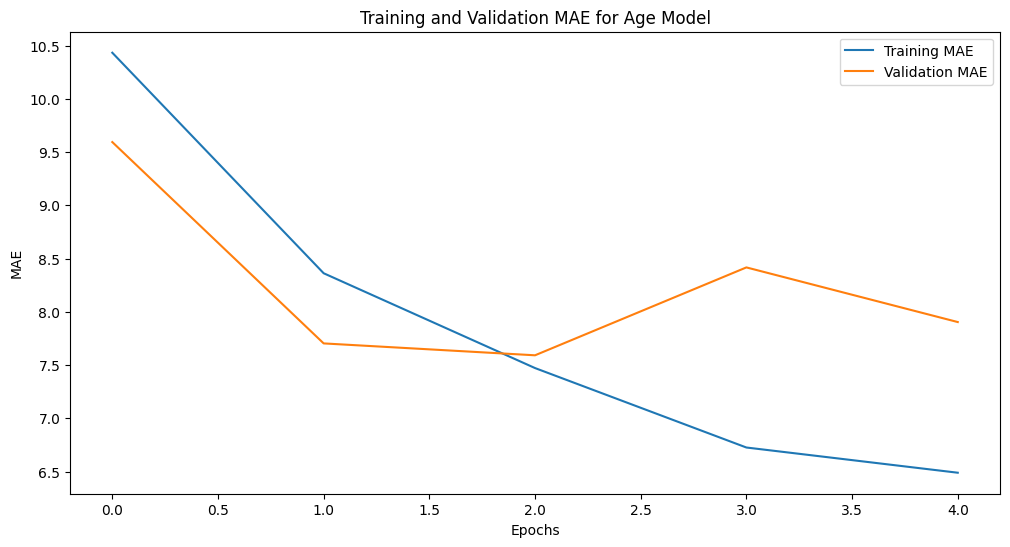

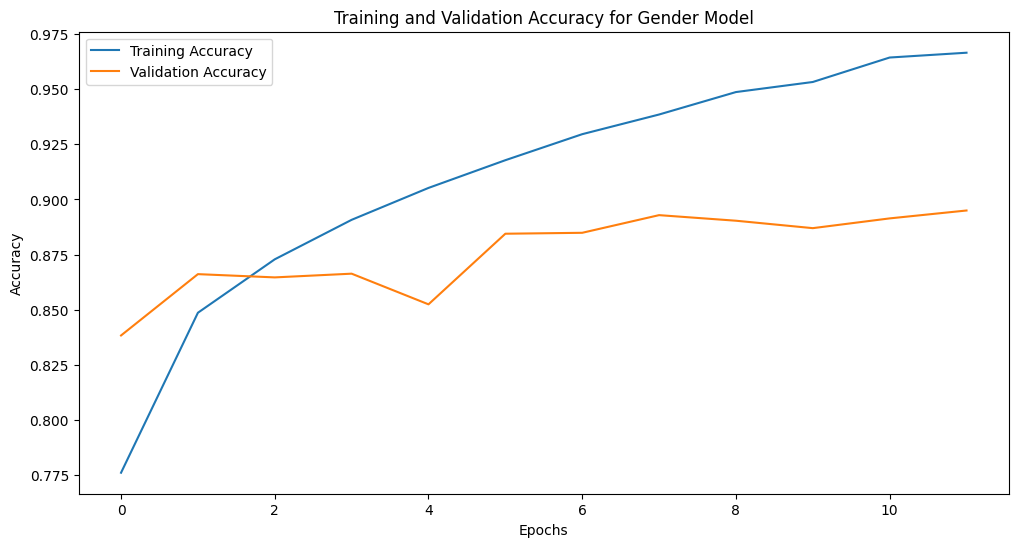

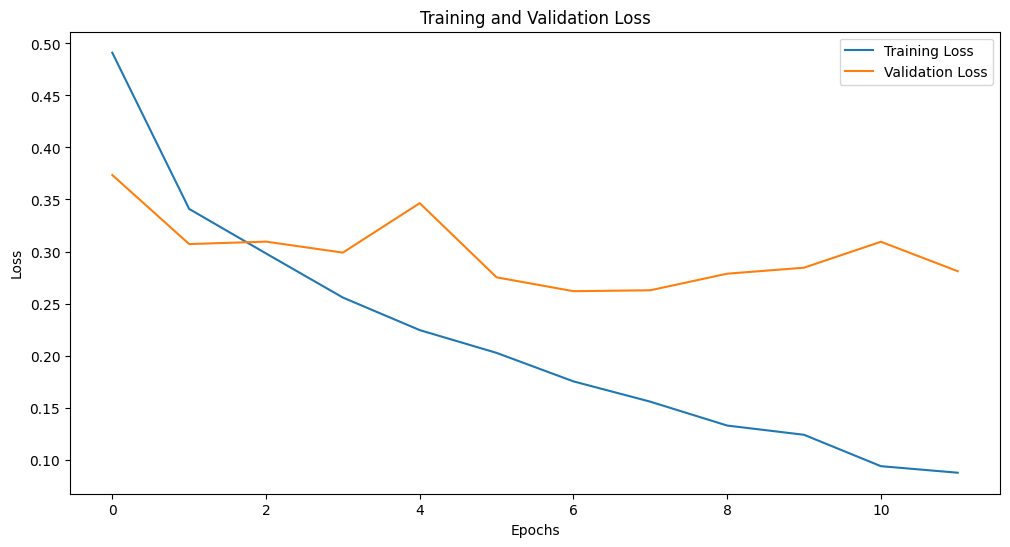

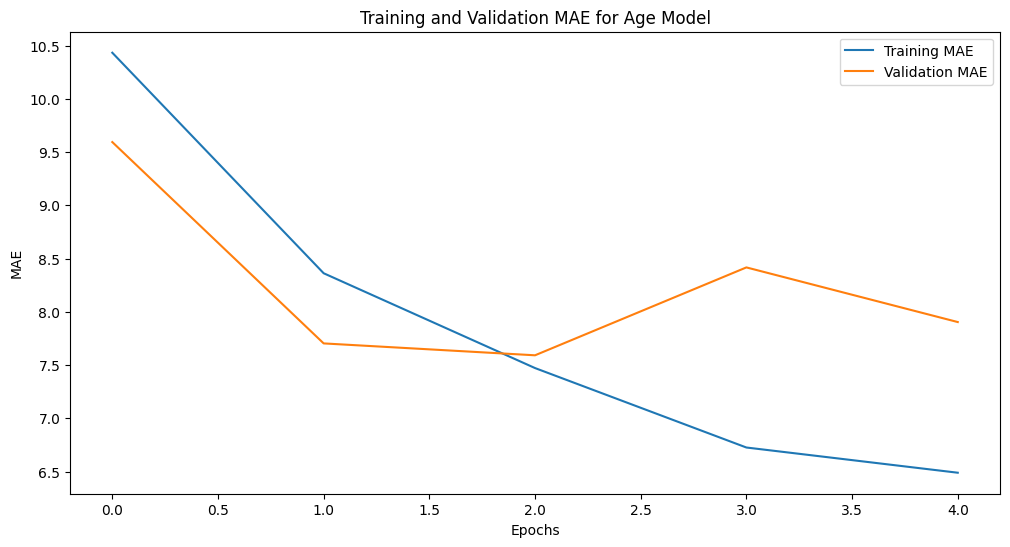

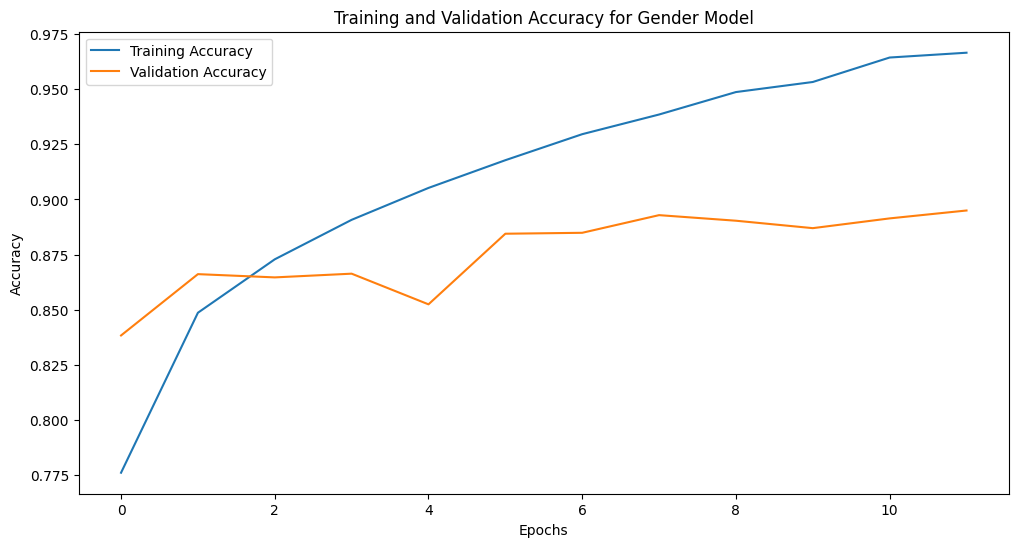

In [ ]:
import matplotlib.pyplot as plt

def plot_learning_curve(history):
    # 손실 그래프
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')
    plt.show()

    # age_model의 정확도 그래프
    plt.figure(figsize=(12, 6))
    plt.plot(history_age.history['mae'], label='Training MAE')
    plt.plot(history_age.history['val_mae'], label='Validation MAE')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()
    plt.title('Training and Validation MAE for Age Model')
    plt.show()

    # gender_model의 정확도 그래프
    plt.figure(figsize=(12, 6))
    plt.plot(history_gender.history['accuracy'], label='Training Accuracy')
    plt.plot(history_gender.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy for Gender Model')
    plt.show()

# 학습 곡선 그리기
plot_learning_curve(history_age)
plot_learning_curve(history_gender)


In [ ]:
print(history_age.history.keys())
print(history_gender.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [ ]:
# gender_model의 테스트 성능 평가
loss_gender, accuracy_gender = gender_model.evaluate(x_test_gender, y_test_gender)
print("Gender Model - Test Loss:", loss_gender)
print("Gender Model - Test Accuracy:", accuracy_gender)

# age_model의 테스트 성능 평가
loss_age, mae_age = age_model.evaluate(x_test_age, y_test_age)
print("Age Model - Test Loss:", loss_age)
print("Age Model - Test MAE:", mae_age)

297/297 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.8956 - loss: 0.2802
Gender Model - Test Loss: 0.2885177433490753
Gender Model - Test Accuracy: 0.8896035552024841
297/297 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - loss: 127.3452 - mae: 7.9544
Age Model - Test Loss: 122.9863510131836
Age Model - Test MAE: 7.873958587646484


In [ ]:
# gender_model의 예측값 생성
predictions_gender = gender_model.predict(x_test_gender)

# age_model의 예측값 생성
predictions_age = age_model.predict(x_test_age)

297/297 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
297/297 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step


In [ ]:
predictions_gender

array([[1.6373098e-06],
       [2.1392809e-02],
       [2.5816512e-04],
       ...,
       [9.9735743e-01],
       [9.9786866e-01],
       [5.0424005e-05]], dtype=float32)

In [ ]:
predictions_age

array([[40.65915  ],
       [-1.2966523],
       [17.531424 ],
       ...,
       [21.174028 ],
       [23.731655 ],
       [28.188751 ]], dtype=float32)

In [ ]:
from sklearn.metrics import mean_absolute_error

# age_model의 예측값 생성
predictions_age = age_model.predict(x_test_age)

# 평균 절대 오차 계산
age_mae = mean_absolute_error(y_test_age, predictions_age)

# 평균 절대 오차 출력
print("Age Model - Mean Absolute Error:", age_mae)

297/297 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step
Age Model - Mean Absolute Error: 7.873956114257293


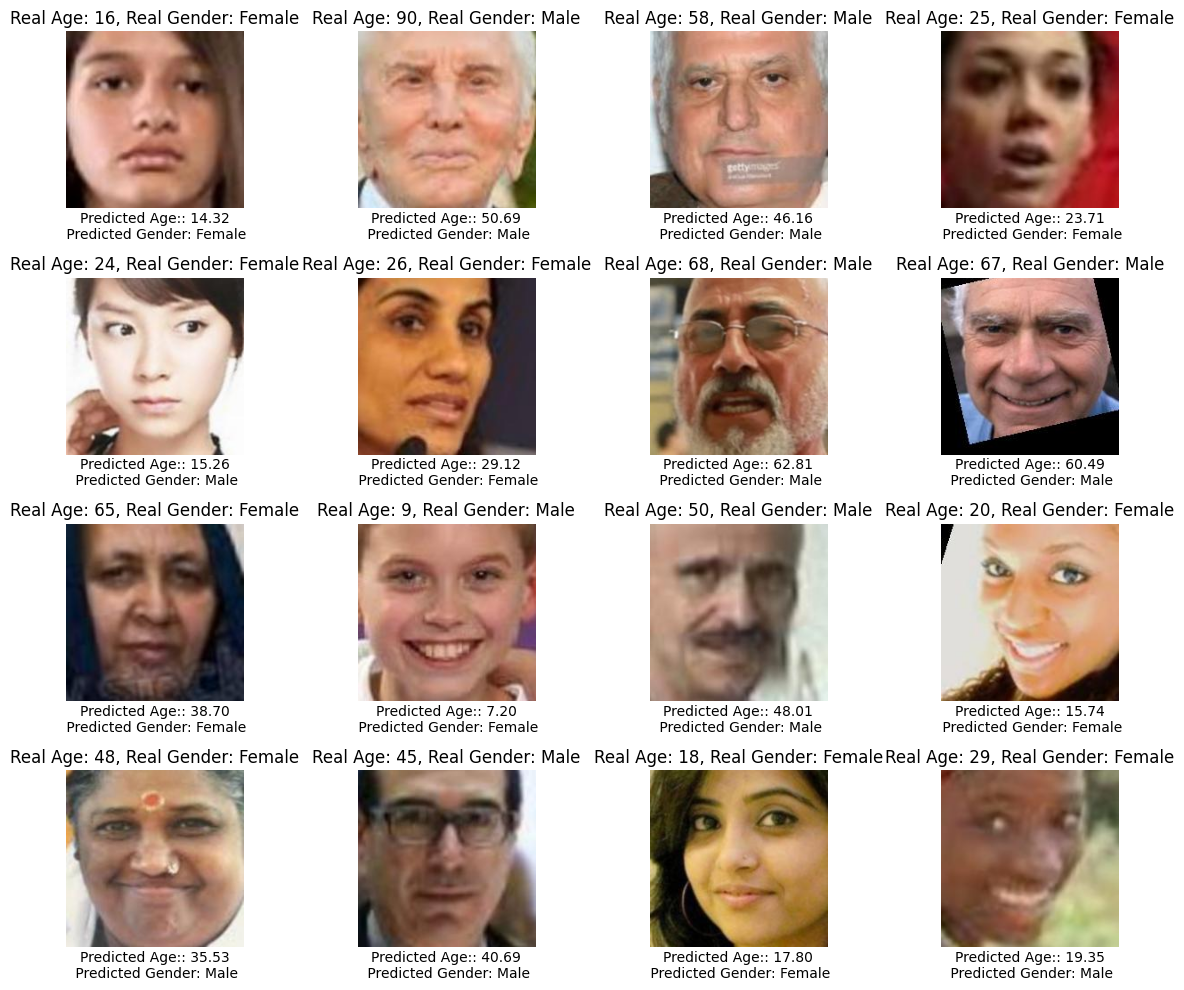

In [ ]:
import random
import matplotlib.pyplot as plt

# 랜덤한 16개의 인덱스 선택
random_indices = random.sample(range(len(x_test_age)), 16)

# 16개의 이미지와 예측값 출력
plt.figure(figsize=(12, 10))
for i, idx in enumerate(random_indices, 1):
    # 이미지 출력
    plt.subplot(4, 4, i)
    plt.imshow(x_test_age[idx])
    plt.axis('off')

    # 실제 나이와 성별 출력
    real_age = y_test_age[idx]
    real_gender = "Female" if y_test_gender[idx] == 1 else "Male"

    # 예측 나이와 성별 출력
    predicted_age = predictions_age[idx][0]
    predicted_gender = "Female" if predictions_gender[idx][0] >= 0.5 else "Male"

    # 상단에 실제 값 출력
    plt.title(f"Real Age: {real_age}, Real Gender: {real_gender}")

    # 하단에 예측 값 출력
    plt.text(0.5, -0.1, f"Predicted Age:: {predictions_age[idx][0]:.2f}\n Predicted Gender: {predicted_gender}",
             horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()


In [ ]:
gender_model.save('gender_model.h5')
age_model.save('age_model.h5')

from google.colab import files
files.download('gender_model.h5')
files.download('age_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>